#OCR

In [1]:
! apt install tesseract-ocr
! pip install pytesseract
!pip install python-docx
!pip install pyspellchecker


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 77.1 MB/s eta 0:00:00


#import libraries

In [2]:
import pytesseract
import cv2
import pytesseract
from PIL import Image
from docx import Document
import re
import os
import matplotlib.pyplot as plt
from spellchecker import SpellChecker
from transformers import pipeline

# Step 1: Image Acquisition

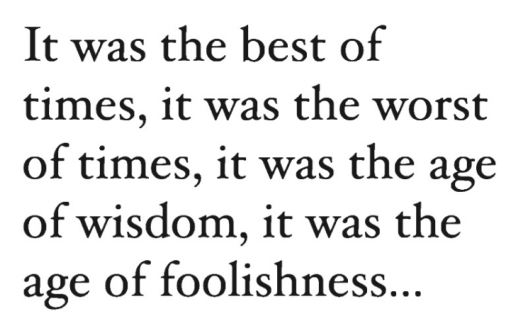

In [3]:
image_path = "/content/OCR_Image.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# Step 2: Preprocessing

In [4]:
# 1. Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Noise reduction
gray = cv2.medianBlur(gray, 3)

# 3. Binarization (thresholding)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. Deskew
coords = cv2.findNonZero(thresh)
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
(h, w) = thresh.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
deskewed = cv2.warpAffine(thresh, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)


# Step 3: Text Detection (Segmentation) & Recognition

In [5]:
custom_config = r'--oem 3 --psm 6'
raw_text = pytesseract.image_to_string(deskewed, config=custom_config)
raw_text = raw_text.replace("-\n", "")
print(raw_text)

we
oc ”N 5 LF N
So? a 8
© —_.
=. ct p oOo
N mts <= DN O
2 <= nm om ct
© avr GO ©
”N
neo
. mot @®



# Step 4: Postprocessing

In [6]:
clean_text = re.sub(r'[^A-Za-z0-9\s.,!?-]', '', raw_text)
clean_text = re.sub(r'\s+', ' ', clean_text).strip()
# Spell correction
spell = SpellChecker()
corrected_words = []

for word in clean_text.split():
    corrected_words.append(spell.correction(word) or word)

corrected_text = " ".join(corrected_words)
print("Before Correction:", clean_text)
print("After Correction :", corrected_text)

Before Correction: we oc N 5 LF N So? a 8 . . ct p oOo N mts DN O 2 nm om ct avr GO N neo . mot
After Correction : we oc N 5 of N so a 8 . . ct p too N its in O 2 no om ct air GO N no . mot


# Step 5: Output Generation


In [7]:
# Save as TXT
with open("output.txt", "w", encoding="utf-8") as f:
    f.write(clean_text)

# Save as DOCX
doc = Document()
doc.add_paragraph(clean_text)
doc.save("output.docx")

# Save as searchable PDF
pdf_path = "output.pdf"
pdf_text = pytesseract.image_to_pdf_or_hocr(deskewed, extension='pdf')
with open(pdf_path, 'wb') as f:
    f.write(pdf_text)

print("OCR Completed")
print("Extracted Text:\n", clean_text)

OCR Completed
Extracted Text:
 we oc N 5 LF N So? a 8 . . ct p oOo N mts DN O 2 nm om ct avr GO N neo . mot


In [8]:
text= pytesseract.image_to_string(cv2.imread('/content/OCR_Image.png'))

In [9]:
text

'It was the best of\ntimes, it was the worst\nof times, it was the age\nof wisdom, it was the\nage of foolishness...\n\x0c'

In [10]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 16.4 MB/s eta 0:00:00


In [11]:
import easyocr

In [13]:
reader=easyocr.Reader(['en'])
text=reader.readtext('/content/OCR_Image.png')

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [14]:
text

[([[np.int32(12), np.int32(14)],
   [np.int32(540), np.int32(14)],
   [np.int32(540), np.int32(87)],
   [np.int32(12), np.int32(87)]],
  'It was the best of',
  np.float64(0.9658044227820689)),
 ([[np.int32(7), np.int32(99)],
   [np.int32(686), np.int32(99)],
   [np.int32(686), np.int32(178)],
   [np.int32(7), np.int32(178)]],
  'times, it was the worst',
  np.float64(0.8699979920837269)),
 ([[np.int32(11), np.int32(181)],
   [np.int32(697), np.int32(181)],
   [np.int32(697), np.int32(267)],
   [np.int32(11), np.int32(267)]],
  'of times, it was the age',
  np.float64(0.7349637745627351)),
 ([[np.int32(11), np.int32(256)],
   [np.int32(649), np.int32(256)],
   [np.int32(649), np.int32(345)],
   [np.int32(11), np.int32(345)]],
  'of wisdom; it was the',
  np.float64(0.8425616344866556)),
 ([[np.int32(7), np.int32(344)],
   [np.int32(563), np.int32(344)],
   [np.int32(563), np.int32(433)],
   [np.int32(7), np.int32(433)]],
  'age of foolishness .',
  np.float64(0.8570522517331303))]

#webscraping

In [15]:
import requests # get data request
from bs4 import BeautifulSoup # parcing content
import pandas as pd

In [16]:
url='https://books.toscrape.com/'
response= requests.get(url)
if(response.status_code==200):
  print('success')

success


In [17]:
soup=BeautifulSoup(response.content,'html.parser')

In [18]:
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [19]:
books=soup.find_all('article',class_='product_pod')
books

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

In [20]:
books=soup.find_all('article',class_='product_pod')
data=[]
for book in books:
  title=book.h3.a.get('title')
  price=book.find('p',class_='price_color').text
  instovck=book.find('p',class_='instock availability').text.strip()
  data.append([title,price,instovck])

In [21]:
data=pd.DataFrame(data,columns=['title','price',"instock"])
data.head()

,title,price,instock
0,A Light in the Attic,£51.77,In stock
1,Tipping the Velvet,£53.74,In stock
2,Soumission,£50.10,In stock
3,Sharp Objects,£47.82,In stock
4,Sapiens: A Brief History of Humankind,£54.23,In stock


In [22]:
len(data)

20

In [23]:
import time
data=[]
i=1
while True:
  url=f'https://books.toscrape.com/catalogue/page-{i}.html'
  response= requests.get(url)
  if(response.status_code==200):
    soup=BeautifulSoup(response.content,'html.parser')
    books=soup.find_all('article',class_='product_pod')
    for book in books:
      title=book.h3.a.get('title')
      price=book.find('p',class_='price_color').text
      instovck=book.find('p',class_='instock availability').text.strip()
      data.append([title,price,instovck])
    i=i+1
  else:
    print(i,response.status_code)
    print('failed')
    break;
data=pd.DataFrame(data,columns=['title','price',"instock"])
print(data.head())
print(len(data))

51 404
failed
                                   title   price   instock
0                   A Light in the Attic  £51.77  In stock
1                     Tipping the Velvet  £53.74  In stock
2                             Soumission  £50.10  In stock
3                          Sharp Objects  £47.82  In stock
4  Sapiens: A Brief History of Humankind  £54.23  In stock
1000
